Introduction

    In this project, I have analyzed the TMDb Movie data set which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This analysis explores the popular genres, keywords over the years, and the properties associated with successful movies.
    The metrics used to mesure the success of a movie are its popularity, revenue and average vote score. The potential factors which affect the success of a movie include its budget, runtime, director, cast, genres, keywords, production companies, release date, etc. Among these factors, budget and runtime are quantitative data, while director, cast, genres, keywords, production companies are qualitative data.

Data Wrangling

In [354]:
# Import statements for all the necessary packages
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [356]:
#Load the data and print out a few lines to inspect data types and to look for potential instances of missing or wrong data
df =pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [203]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [204]:
sum(df.duplicated())

1

In [205]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


There is a duplicated row and I will drop it in the data cleaning stage.

In [206]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are small numbes of null values in cast, director and genres columns and they will be dropped in the data cleaning stage.

In [207]:
df_budget_zero=df.query('budget==0')
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [208]:
df_revenue_zero=df.query('revenue==0')
df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


In [209]:
df_budget_zero_count=df.groupby('budget').count()['id']
df_budget_zero_count.head(3)

budget
0    5696
1       4
2       1
Name: id, dtype: int64

In [210]:
df_revenue_zero_count=df.groupby('revenue').count()['id']
df_revenue_zero_count.head(3)

revenue
0    6016
2       2
3       3
Name: id, dtype: int64

In [211]:
df_runtime_zero_count=df.groupby('runtime').count()['id']
df_runtime_zero_count.head(3)

runtime
0    31
2     5
3    11
Name: id, dtype: int64

31 is a small number so I have decided to drop the same.

The following columns are uncessary to answer questions so that they should be dropped: imdb_id, homepage, tagline, overview, budget_adj, revenue_adj.

In [212]:
col=['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)

In [213]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


Drop the Duplicates

In [214]:
df.drop_duplicates(inplace=True)

Drop the null values in cast, director and genres columns

In [215]:
col2 = ['cast','director','genres']
df.dropna(subset=col2, how='any', inplace=True)

In [216]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Replace zero values with null values in the budget and revenue column.

In [217]:
df['budget']=df['budget'].replace(0,np.NaN)
df['revenue']=df['revenue'].replace(0,np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


Drop zero values under the column runtime

In [218]:
df.query('runtime!=0', inplace=True)
df.query('runtime==0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


After amending all zero values to null values in 'revenue' and 'budget', the disbribution of these two columns become more reasonable without too much concenration on the zero or small values. Also, the minimum runtime makes more sense now after deleting the zero values.

In [220]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Exploratory Data Analysis

1. What are the number of movies released, popular genres and keywords over the years?
2. What are the properties associated with movies of high popularity?
3. What are the properties associated with movies of high revenue?
4. What are the properties associated with movies of high ratings?

Research Question 1: What are the number of movies released, popular genres and keywords over the years?

1.1: Number of movies released year by year

In [288]:
movie_count=df.groupby('release_year').count()['id']

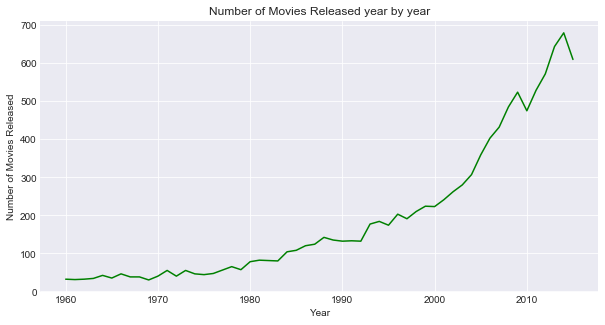

In [303]:
movie_count.plot('line',figsize=(10,5),color='green')
plt.title('Number of Movies Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released');

1.2: Popular genres over the years

In [278]:
find_top(dfn.genres)

Drama       3050
Comedy      2368
Thriller    1933
Action      1449
Romance     1069
Name: top, dtype: int64

In [270]:
dfyear= df.release_year.unique()
dfyear= np.sort(dfyear)
dfyear

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [271]:
y1960s=dfyear[:10]
y1970s=dfyear[10:20]
y1980s=dfyear[20:30]
y1990s=dfyear[30:40]
y2000s=dfyear[40:]

In [275]:
#year of each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000s]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000s']
#creat an empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in times:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.genres,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3   

,year,top
Drama,1960s,167
Drama,1970s,238
Comedy,1980s,428
Drama,1990s,862
Drama,after2000s,3050


Text(0.5,1,'Genres Trends by Generation')

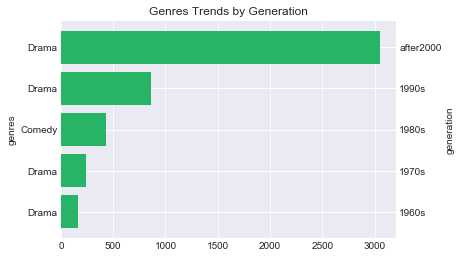

In [277]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
genres = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1, color = '#007482')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(genres)
#set left side y axis label
ax.set_ylabel('genres')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#27b466')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Genres Trends by Generation')

1.3:Popular keywords over the years

In [279]:
find_top(dfn.keywords)

woman director          347
independent film        277
based on novel          176
sex                     168
duringcreditsstinger    143
Name: top, dtype: int64

In [280]:
#year of each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000s]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000s']
#creat an empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in times:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.keywords,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3   

,year,top
based on novel,1960s,16
based on novel,1970s,23
nudity,1980s,39
independent film,1990s,80
woman director,after2000s,347


Text(0.5,1,'Genres Trends by Generation')

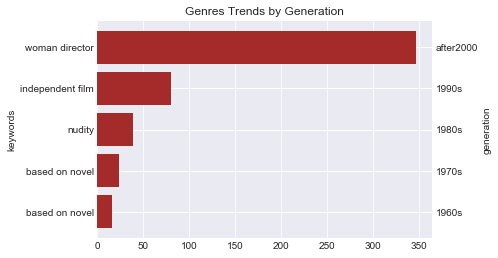

In [286]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
genres = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1)
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(genres)
#set left side y axis label
ax.set_ylabel('keywords')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = 'brown')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Genres Trends by Generation')

Research Question 2. What are the properties associated with movies of high popularity?

2.1: Is budget level associated with the popularity of movies?

In [225]:
def cut_into_quantile(dfname, column_name):
    min_value=dfname[column_name].min()
    first_quantile=dfname[column_name].describe()[4]
    second_quantile=dfname[column_name].describe()[5]
    third_quantile=dfname[column_name].describe()[6]
    max_value=dfname[column_name].max()
    bin_edges=[min_value, first_quantile, second_quantile, third_quantile, max_value]
    bin_names=['Low', 'Medium','Moderately High', 'High']
    name='{}_levels'.format(column_name)
    dfname[name]=pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest=True)
    return dfname
    

In [253]:
df=cut_into_quantile(df,'budget')
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,High


In [261]:
result_mean=df.groupby('budget_levels')['popularity'].mean()
result_mean

budget_levels
Low                0.510678
Medium             0.726490
Moderately High    0.988660
High               1.821742
Name: popularity, dtype: float64

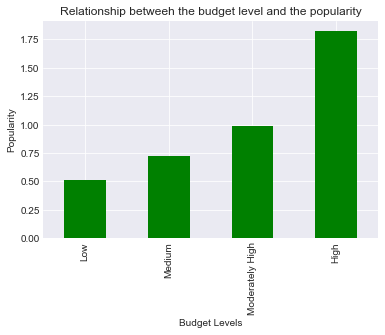

In [333]:
result_mean.plot('bar',color='green')
plt.title('Relationship betweeh the budget level and the popularity')
plt.xlabel('Budget Levels')
plt.ylabel('Popularity');

The result shows that movies with higher budget levels have higher popularity.

2.2: Is runtime associated with the popularity of movies?

In [353]:
df = cut_into_quantile(df,'runtime')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High,High


In [329]:
result7_mean = df.groupby('runtime_levels')['popularity'].mean()
result7_mean

runtime_levels
Low                0.418723
Medium             0.551560
Moderately High    0.656342
High               1.019749
Name: popularity, dtype: float64

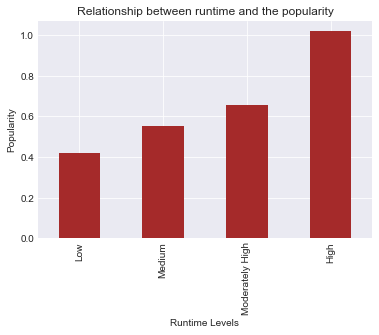

In [330]:
result7_mean.plot('bar', color='brown')
plt.title('Relationship between runtime and the popularity')
plt.xlabel('Runtime Levels')
plt.ylabel('Popularity');

The chart above shows that movies with longer runtime are more popular.

2.3: What are the casts, directors, genres, production companies, keywords that are associated with the movies of high popularity?

In [226]:
def find_top(dataframe_col, num=5):
    alist=dataframe_col.str.cat(sep='|').split('|')
    new=pd.DataFrame({'top':alist})
    top=new['top'].value_counts().head(num)
    return top

Select top 50 popular movies every year

In [243]:
df_top_p=df.sort_values(['release_year','popularity'], ascending=[True,False])
df_top_p=df_top_p.groupby('release_year').head(50).reset_index(drop=True)
df_top_p.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960
2,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960
3,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960
4,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960


Select top 50 unpopular movies every year

In [244]:
df_bottom_p=df.sort_values(['release_year','popularity'], ascending=[True,True])
df_bottom_p=df_bottom_p.groupby('release_year').head(50).reset_index(drop=True)
df_bottom_p.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,12/18/60,13,7.2,1960
1,39890,0.065808,NaN,NaN,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,Vulcan Productions Inc.,9/9/60,13,6.1,1960
2,29756,0.110511,NaN,NaN,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,William Castle,haunted house,85,Horror,Columbia Pictures|William Castle Productions,8/5/60,12,5.5,1960
3,15788,0.114188,NaN,10000000.0,The Bellboy,Jerry Lewis|Alex Gerry|Bob Clayton|Sonnie Sand...,Jerry Lewis,hotel|gag humor|madcap comedy|bellhop Â,72,Comedy|Family,Paramount Pictures|Jerry Lewis Productions,7/20/60,12,7.0,1960
4,11773,0.127219,200000.0,NaN,Village of the Damned,George Sanders|Barbara Shelley|Martin Stephens...,Wolf Rilla,suicide|england|based on novel|parents kids re...,77,Horror|Science Fiction,Metro-Goldwyn-Mayer (MGM),7/1/60,28,7.0,1960


In [229]:
a=find_top(df_top_p.cast)
b=find_top(df_top_p.director)
c=find_top(df_top_p.genres)
d=find_top(df_top_p.keywords)
e=find_top(df_top_p.production_companies)
df_popular=pd.DataFrame({'popular_cast':a.index, 'popular_director':b.index, 'popular_genres':c.index, 'popular_keywords':d.index, 'popular_producers':e.index})
df_popular

,popular_cast,popular_director,popular_genres,popular_keywords,popular_producers
0,Clint Eastwood,Steven Spielberg,Drama,based on novel,Warner Bros.
1,Robert De Niro,Clint Eastwood,Comedy,dystopia,Universal Pictures
2,Michael Caine,Martin Scorsese,Action,musical,Paramount Pictures
3,Tom Hanks,Woody Allen,Thriller,new york,Twentieth Century Fox Film Corporation
4,Sylvester Stallone,Ridley Scott,Adventure,prison,Columbia Pictures


In [230]:
na=find_top(df_bottom_p.cast)
nb=find_top(df_bottom_p.director)
nc=find_top(df_bottom_p.genres)
nd=find_top(df_bottom_p.keywords)
ne=find_top(df_bottom_p.production_companies)
df_unpopular=pd.DataFrame({'unpopular_cast':na.index, 'unpopular_director':nb.index, 'unpopular_genres':nc.index, 'unpopular_keywords':nd.index, 'unpopular_producers':ne.index})
df_unpopular

,unpopular_cast,unpopular_director,unpopular_genres,unpopular_keywords,unpopular_producers
0,Clint Eastwood,Sidney Lumet,Drama,independent film,Universal Pictures
1,Christopher Lee,Norman Jewison,Comedy,woman director,Paramount Pictures
2,John Wayne,Woody Allen,Thriller,based on novel,Warner Bros.
3,Peter Cushing,Gerald Thomas,Action,sex,Metro-Goldwyn-Mayer (MGM)
4,Vincent Price,Blake Edwards,Horror,sport,Twentieth Century Fox Film Corporation


Research Question 3: What are the properties associated with the movies of high revenue?

3.1 Is budget level associated with the movies of high revenue?

In [259]:
result2_mean = df.groupby('budget_levels')['revenue'].mean()
result2_mean

budget_levels
Low                2.333463e+07
Medium             4.363794e+07
Moderately High    7.788998e+07
High               2.397049e+08
Name: revenue, dtype: float64

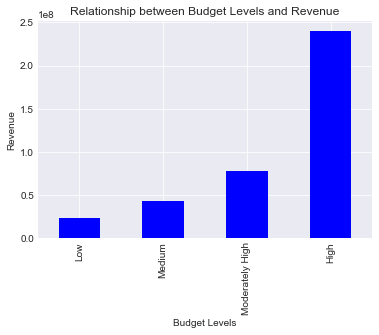

In [335]:
result2_mean.plot('bar', color='blue')
plt.title('Relationship between Budget Levels and Revenue')
plt.xlabel('Budget Levels')
plt.ylabel('Revenue');

3.2 What are the casts, directors, genres and production companies that are associated with the movies that have high/low revenue?

In [249]:
df_top_r=df.sort_values(['release_year','revenue'], ascending=[True,False])
df_top_r=df_top_r.groupby('release_year').head(50).reset_index(drop=True)
df_top_r.tail(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2622,266647,2.234573,150000000.0,128388320.0,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,flying|magic|fairy tale|peter pan|mermaid,111,Adventure|Family|Fantasy,Warner Bros.|Moving Picture Company (MPC)|Berl...,9/24/15,586,5.9,2015
2623,264999,1.338481,14800000.0,122413057.0,Magic Mike XXL,Channing Tatum|Matt Bomer|Joe Manganiello|Kevi...,Gregory Jacobs,male friendship|strip club|road trip|strip tea...,115,Comedy|Drama|Music,Warner Bros.|Iron Horse Entertainment (II),7/1/15,501,6.3,2015
2624,203801,3.053421,75000000.0,108145109.0,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,Guy Ritchie,spy|cold war|remake|based on tv series|buddy cop,116,Comedy|Action|Adventure,Davis Entertainment|Warner Bros.|Wigram Produc...,8/13/15,1548,7.0,2015


In [251]:
f=find_top(df_top_r.cast)
g=find_top(df_top_r.director)
h=find_top(df_top_r.genres)
i=find_top(df_top_r.production_companies)
df_top_revenue=pd.DataFrame({'high_revenue_cast':f.index, 'high_revenue_director':g.index, 'high_revenue_genres':h.index, 'high_revenue_producers':i.index})
df_top_revenue

,high_revenue_cast,high_revenue_director,high_revenue_genres,high_revenue_producers
0,Clint Eastwood,Steven Spielberg,Drama,Warner Bros.
1,Robert De Niro,Clint Eastwood,Comedy,Universal Pictures
2,Sylvester Stallone,Martin Scorsese,Action,Paramount Pictures
3,Tom Hanks,Ridley Scott,Thriller,Twentieth Century Fox Film Corporation
4,Michael Caine,Woody Allen,Adventure,Columbia Pictures


What are the casts, directors, genres and production companies that are associated with the movies that have low revenue?

In [250]:
df_bottom_r=df.sort_values(['release_year','revenue'], ascending=[True,True])
df_bottom_r=df_bottom_r.groupby('release_year').head(50).reset_index(drop=True)
df_bottom_r.tail(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2622,302528,0.820691,NaN,1986615.0,Remember,Christopher Plummer|Martin Landau|Dean Norris|...,Atom Egoyan,NaN,94,Drama|Thriller,Serendipity Point Films|Egoli Tossell Film AG,10/23/15,75,7.7,2015
2623,301875,1.959765,NaN,2000000.0,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,illustrator|sex scene|near future|infected|emo...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015
2624,266639,0.435582,5000000.0,2333684.0,Jem and the Holograms,Aubrey Peeples|Stefanie Scott|Aurora Perrineau...,Jon M. Chu,secret identity|hologram|based on cartoon|base...,119,Drama|Music|Adventure|Fantasy,Universal Pictures|Blumhouse Productions|Hasbr...,10/22/15,69,5.7,2015


In [252]:
nf=find_top(df_bottom_r.cast)
ng=find_top(df_bottom_r.director)
nh=find_top(df_bottom_r.genres)
ni=find_top(df_bottom_r.production_companies)
df_low_revenue=pd.DataFrame({'low_revenue_cast':nf.index, 'low_revenue_director':ng.index, 'low_revenue_genres':nh.index, 'low_revenue_producers':ni.index})
df_low_revenue

,low_revenue_cast,low_revenue_director,low_revenue_genres,low_revenue_producers
0,Clint Eastwood,Woody Allen,Drama,Warner Bros.
1,Sean Connery,Blake Edwards,Comedy,Universal Pictures
2,Gene Hackman,John Carpenter,Thriller,Paramount Pictures
3,John Wayne,Brian De Palma,Action,Metro-Goldwyn-Mayer (MGM)
4,Robert De Niro,Martin Scorsese,Romance,Twentieth Century Fox Film Corporation


In [339]:
#Comparison
df_top_revenue

,high_revenue_cast,high_revenue_director,high_revenue_genres,high_revenue_producers
0,Clint Eastwood,Steven Spielberg,Drama,Warner Bros.
1,Robert De Niro,Clint Eastwood,Comedy,Universal Pictures
2,Sylvester Stallone,Martin Scorsese,Action,Paramount Pictures
3,Tom Hanks,Ridley Scott,Thriller,Twentieth Century Fox Film Corporation
4,Michael Caine,Woody Allen,Adventure,Columbia Pictures


3.3 Is runtime associated with the revenue level of movies?

In [267]:
result3_mean = df.groupby('runtime_levels')['revenue'].mean()
result3_mean

runtime_levels
Low                5.298638e+07
Medium             6.409306e+07
Moderately High    6.900272e+07
High               1.410586e+08
Name: revenue, dtype: float64

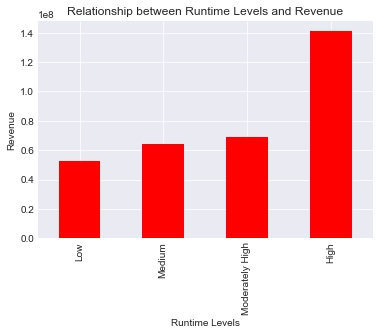

In [336]:
result3_mean.plot('bar', color='red')
plt.title('Relationship between Runtime Levels and Revenue')
plt.xlabel('Runtime Levels')
plt.ylabel('Revenue');

Research question 4: What are the properties associated with movies of high ratings?

4.1: Is revenue level associated with the rating score of movies?

In [309]:
df=cut_into_quantile(df,'revenue')
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High,High,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High,High,High


In [313]:
result4_mean = df.groupby('revenue_levels')['vote_average'].mean()
result4_mean

revenue_levels
Low                6.024030
Medium             6.030636
Moderately High    6.166914
High               6.375021
Name: vote_average, dtype: float64

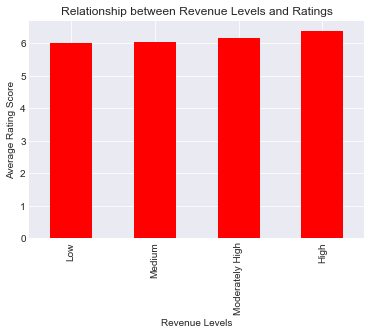

In [337]:
result4_mean.plot('bar', color='red')
plt.title('Relationship between Revenue Levels and Ratings')
plt.xlabel('Revenue Levels')
plt.ylabel('Average Rating Score');

From the image above, it can be concluded that movies with high revenue don't have significantly high ratings.

4.2: Is budget level associated with the ratings?

In [315]:
result5_mean = df.groupby('budget_levels')['vote_average'].mean()
result5_mean

budget_levels
Low                5.947569
Medium             6.016922
Moderately High    6.066133
High               6.104504
Name: vote_average, dtype: float64

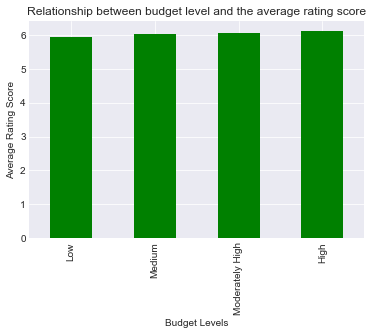

In [316]:
result5_mean.plot('bar', color='green')
plt.title('Relationship between budget level and the average rating score')
plt.xlabel('Budget Levels')
plt.ylabel('Average Rating Score');

From the image above, it can be concluded that movies with high budget don't have significantly high ratings.

4.3: Is runtime associated with the ratings?

In [317]:
result6_mean = df.groupby('runtime_levels')['vote_average'].mean()
result6_mean

runtime_levels
Low                5.726425
Medium             5.724355
Moderately High    6.044946
High               6.401297
Name: vote_average, dtype: float64

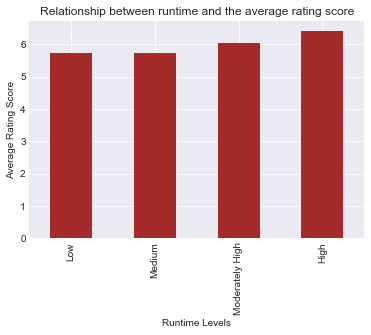

In [318]:
result6_mean.plot('bar', color='brown')
plt.title('Relationship between runtime and the average rating score')
plt.xlabel('Runtime Levels')
plt.ylabel('Average Rating Score');

From the image above, it can be concluded that movies with long runtime don't have significantly high ratings.

4.4: What are the cast, directors, genres and keywords that are associated with high ratings?

Casts, directos, genres and keywords associated with high voting scores:

In [320]:
df_top_s=df.sort_values(['release_year','vote_average'], ascending=[True,False])
df_top_s=df_top_s.groupby('release_year').head(50).reset_index(drop=True)
df_top_s.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels,revenue_levels
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,Low,Moderately High,Moderately High
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,Low,High,Medium
2,11167,0.569424,NaN,NaN,Peeping Tom,Karlheinz BÃ¶hm|Moira Shearer|Anna Massey|Maxi...,Michael Powell,cinematographer|photography|illegal prostitution,101,Horror|Thriller,National Film Finance Corporation (NFFC)|Anglo...,4/6/60,56,7.4,1960,NaN,Moderately High,NaN
3,2134,0.712389,750000.0,NaN,The Time Machine,Rod Taylor|Alan Young|Yvette Mimieux|Sebastian...,George Pal,london|inventor|future|time travel|dystopia,103,Thriller|Adventure|Fantasy|Science Fiction|Rom...,George Pal Productions|Galaxy Films Inc.,8/17/60,101,7.3,1960,Low,Moderately High,NaN
4,31102,0.254124,NaN,NaN,Pollyanna,Hayley Mills|Jane Wyman|Richard Egan|Karl Mald...,David Swift,friends|girl|tween girl,134,Drama|Family,Walt Disney Productions,5/19/60,25,7.2,1960,NaN,High,NaN


In [325]:
j=find_top(df_top_s.cast)
k=find_top(df_top_s.director)
l=find_top(df_top_s.genres)
m=find_top(df_top_s.keywords)
df_high_score=pd.DataFrame({'high_score_cast':j.index, 'high_score_director':k.index, 'high_score_genres':l.index, 'high_score_keywords':m.index})
df_high_score

,high_score_cast,high_score_director,high_score_genres,high_score_keywords
0,Clint Eastwood,Martin Scorsese,Drama,based on novel
1,Michael Caine,Steven Spielberg,Comedy,independent film
2,Sean Connery,Woody Allen,Thriller,musical
3,Robert De Niro,Clint Eastwood,Action,prison
4,Gene Hackman,Sidney Lumet,Romance,sex


Casts, directos, genres and keywords associated with low voting scores:

In [326]:
df_low_s=df.sort_values(['release_year','vote_average'], ascending=[True,True])
df_low_s=df_bottom_s.groupby('release_year').head(50).reset_index(drop=True)
df_low_s.tail(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels,revenue_levels
2620,326425,0.872149,NaN,16775.0,Extraction,Bruce Willis|Gina Carano|Kellan Lutz|D. B. Swe...,Steven C. Miller,terrorist|kidnapping|ex cia agent|rescue opera...,83,Action|Thriller,Emmett/Furla Films|Oasis Films|Aperture Entert...,12/18/15,57,4.2,2015,NaN,Low,Low
2621,332502,0.644786,NaN,NaN,400 Days,Caity Lotz|Brandon Routh|Tom Cavanagh|Dane Coo...,Matt Osterman,spacecraft|experiment|simulation|space|astronaut,91,Mystery|Science Fiction|Thriller,New Artists Alliance,10/29/15,98,4.2,2015,NaN,Medium,NaN
2622,308638,0.402236,447524.0,771317.0,The D Train,Jack Black|James Marsden|Kathryn Hahn|Jeffrey ...,Andrew Mogel|Jarrad Paul,high school reunion,101,Drama|Comedy,Ealing Studios|Electric Dynamite|Rip Cord Prod...,5/8/15,47,4.2,2015,Low,Moderately High,Low
2623,335970,0.347797,NaN,NaN,Joe Dirt 2: Beautiful Loser,David Spade|Brittany Daniel|Dennis Miller|Chri...,Fred Wolf,white trash,107,Comedy,Happy Madison Productions,7/16/15,23,4.2,2015,NaN,Moderately High,NaN
2624,296130,0.327066,NaN,NaN,Harbinger Down,Lance Henriksen|Matt Winston|Camille Balsamo|G...,Alec Gillis,cosmonaut|marine researchers|crab boat|bering ...,82,Science Fiction|Horror,Dark Dunes Productions|Studio ADI,8/7/15,32,4.2,2015,NaN,Low,NaN


In [327]:
nj=find_top(df_low_s.cast)
nk=find_top(df_low_s.director)
nl=find_top(df_low_s.genres)
nm=find_top(df_low_s.keywords)
df_low_score=pd.DataFrame({'low_score_cast':nj.index, 'low_score_director':nk.index, 'low_score_genres':nl.index, 'low_score_keywords':nm.index})
df_low_score

,low_score_cast,low_score_director,low_score_genres,low_score_keywords
0,Clint Eastwood,Blake Edwards,Comedy,sex
1,Jean-Claude Van Damme,Sidney Lumet,Drama,independent film
2,Sean Connery,Gerald Thomas,Thriller,female nudity
3,Christopher Lee,Uwe Boll,Action,nudity
4,John Wayne,Norman Jewison,Horror,suspense


In [328]:
#Comparison
df_high_score

,high_score_cast,high_score_director,high_score_genres,high_score_keywords
0,Clint Eastwood,Martin Scorsese,Drama,based on novel
1,Michael Caine,Steven Spielberg,Comedy,independent film
2,Sean Connery,Woody Allen,Thriller,musical
3,Robert De Niro,Clint Eastwood,Action,prison
4,Gene Hackman,Sidney Lumet,Romance,sex


Further Research

In [351]:
df_top_pop_all_time=df.sort_values(['popularity'], ascending=False)
df_top_pop_all_time.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High,High,High
629,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,High,High,High
630,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,High,High,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High,High,High
631,100402,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,3848,7.6,2014,High,High,High
1329,11,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,Medium,High,High
632,245891,11.422751,20000000.0,7.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,hitman|revenge|murder|gangster|dog,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,10/22/14,2712,7.0,2014,Moderately High,Moderately High,Moderately High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High,High,High
633,131631,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,resistance|post-apocalyptic|dystopia|war|sequel,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,11/18/14,3590,6.6,2014,High,High,High


In [352]:
df_top_rev_all_time=df.sort_values(['revenue'], ascending=False)
df_top_rev_all_time.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels,revenue_levels
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,High,High,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High,High,High
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,High,High,High
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,High,High,High
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,High,High,High
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,High,High,High
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,High,High,High
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,High,Moderately High,High
5425,68721,4.946136,200000000.0,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,High,High,High


Conclusion:

     In the first part of Exploratory Data Analysis, I studied the number of movies released, the keywords and genres over the years. I divided the time periods into five categories: 1960s, 1970s, 1980s, 1990s and 2000s.
     The number of movies released are increasing year by year. The top genre across the entire period is drama, except in 1980s, which was comedy. Also, during 1960s and 1970s, the top keyword associated with movies was based on novel; duing 1980s, it became nudity. The 1990s was dominated by independent film and 2000s by woman director

     The analysis shows that, from 1960 to 2015, on average, the movies with higher budget levels and longer runtime are more popular. Also, Robert de Niro, Michael Caine, Tom Hanks and Sylvester Stallone are the top leads in popular movies. Steven Spielberg, Clint Eastwood, Martin Scorsese and Ridley Scott are the top directors for popular movies. Drama, Comedy, Action and Thriller appear in both popular and unpopular genres categories. Adventure movies are more popular than horror movies. Movies with keywords "dystopia", "musical", "new york" and "prison" receive high popularity. The top five companies which produce popular movies are Warner Bros., Universal Pictures, Paramount Pitures, Twentieth Century Fox Film Corporation and Columbia Pictures. But the former four companies are also the top producers of unpopular movies.
    Similarly, movies with high budget levels and long runtime receive more revenue. The casts that are associated with high revenue movies are Robert De Niro, Sylvester Stallone, Tom Hanks and Michael Caine. The directors are Steven Spielberg, Clint Eastwood and Ridley Scott. Drama, Comedy, Action and Thriller appear in both categories. Warner Bros., Universal Pictures, Paramount Pictures and Twentieth Century Fox Film Corporation are the top production companies for both high revenue and low revenue movies.
    Finally, runtime, budget levels and revenue levels have no impact on the ratings of the movies. The casts that are associated with high rating movies are Michael Caine, Robert de Niro and Gene Hackman; and the directors are Martin Scorsese, Steven Spielberg, Woody Allen and Clint Eastwood. Also movies with keywords "based on novel", "musical" and "prison" receive high rating.

    I also made some interesting research to find out the top ten movies with the highesst popularity and revenue of all time. It shows that most of these movies are from the millenium period. Except Titanic which was released in 1997, and the all time classic Jurassic World which was released in 1977, the ohter movies were released after 2008. This result is not surprising. Nowadays, in the internet age, people have more access to information such as movie trailers and review. This easier access might be one of the main reasons that boosts the popularity and revenue of the movie industry.

Limitations:
1. The metric Popularity is not defined clearly. 
2. Budget and revenue, instead of adjusted budget and adjusted revenue, which take inflation into consideration, are used in the analysis. Also, we don't know in which currency they are measured in.
3. The effect of the combination of qualitative data is not reflected. For example, drama is the most popular genre based on the analysis. However, the true genres for a popular movie might be drama/adventure/action. Would certain combinations make a movie more popular than the others? This question cannot be answered here.

In [304]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295